In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binom, uniform, chi2, t, norm, ttest_1samp, ttest_ind, ttest_rel, f
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

Fly        Freq  Reative Freq
18 ~ 73       9          0.18
73 ~ 128     11          0.22
128 ~ 183    18          0.36
183 ~ 238     9          0.18
238 ~ 293     3          0.06
All          50          1.00


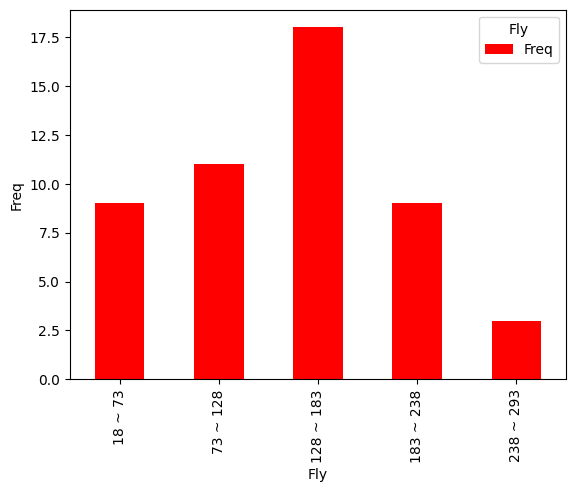

138.5


In [23]:
# 1
fly = np.array([164,292,102,153,139,18,92,236,241,202,31,24,145,188,293,204,32,220,154,131,45,214,62,188,129,
             171,161,151,142,118,171,190,129,115,168,94,230,139,100,99,99,72,103,109,176,111,59,44,140,135])

a1 = np.min(fly) # 18
a2 = np.min(fly) + (np.max(fly) - np.min(fly)) / 5 # 73
a3 = np.min(fly) + (np.max(fly) - np.min(fly)) / 5 * 2 # 128 
a4 = np.min(fly) + (np.max(fly) - np.min(fly)) / 5 * 3 # 183
a5 = np.min(fly) + (np.max(fly) - np.min(fly)) / 5 * 4 # 238
a6 = np.max(fly) # 293

ranges = [a1 - 1, a2, a3, a4, a5, a6]
fly_cut = pd.cut(fly, ranges)

table1 = pd.crosstab(index = fly_cut, colnames = ['Fly'], columns = 'Freq', margins = True)

for i in range(6):
  table1.iloc[i,1] = table1.iloc[i,1]/table1.iloc[5,0]

table1.rename(columns = {'All' : 'Reative Freq'}, inplace = True)
table1.index = ['18 ~ 73','73 ~ 128','128 ~ 183','183 ~ 238','238 ~ 293', 'All']
print(table1)

table2 = pd.crosstab(index = fly_cut, colnames = ['Fly'], columns = 'Freq', margins = False)
table2.index = ['18 ~ 73','73 ~ 128','128 ~ 183','183 ~ 238','238 ~ 293']
table2.plot(kind = 'bar',color = 'red', legend = True)

plt.xlabel('Fly')
plt.ylabel('Freq')
plt.show()

print(np.mean(fly))


# 1번 -> 2)
# 위 그래프를 통해 알 수 있는 대표값 : 평균값
# 평균 : 138.5

In [24]:
# 2
root_n = np.round(np.sqrt(1.65 * 7.2 / 0.9), 0) #90프로는 z = 1.65? 
print(root_n * root_n)

#15g, 오차한계 1.5g 이내(90% 이내) -> 최소 16개 필요?

16.0


10.591119879146438
9.557882628212488


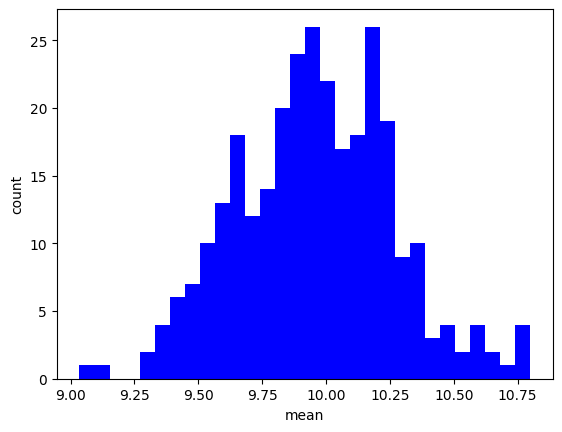

9.956722301542715
0.09550214105613314


In [26]:
# 3 - (1)
random_sample = norm.rvs(loc = 10, scale = np.sqrt(10), size = 100)
print(np.mean(random_sample))

# 3 - (2)
random_sample = norm.rvs(loc = 10, scale = np.sqrt(10), size = 100)
print(np.mean(random_sample))

mean_array = []

for i in range(1, 300):

  random_sample = norm.rvs(loc = 10, scale = np.sqrt(10), size = 100)
#print(np.mean(random_sample))
  mean_array.append(np.mean(random_sample))

plt.hist(mean_array, bins = 30, facecolor = 'blue')
plt.xlabel('mean')
plt.ylabel('count')
plt.show()

means = np.mean(mean_array)
var = np.var(mean_array)

print(means)
print(var)

In [27]:
# 4
char30 = norm.cdf(30, loc=34.3, scale = np.sqrt(30.14))
char35 = norm.cdf(35, loc=34.3, scale = np.sqrt(30.14))
print('지렁이 길이의 사이에 걸릴 확률' , np.round((char35 - char30), 3), '%')

지렁이 길이의 사이에 걸릴 확률 0.334 %


In [11]:
# 5 - (1)
n1 = 550
n2 = 708
p1 = 293/550
p2 = 241/708

z_norm = norm(loc=0,scale=1)
left = (p1-p2) - z_norm.ppf(0.975)*np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
right = (p1-p2) + z_norm.ppf(0.975)*np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

print('두 평균 시청률의 차이의 95% 신뢰구간 : ' , np.round(left , 3), '~' ,np.round(right , 3))


# 5 - (2)
def two_prop(x,n1,y,n2,alternative):
  p1 = x/n1
  p2 = y/n2
  p = (x+y)/(n1+n2)
  t_stat = (p1-p2)/(np.sqrt(p*(1-p)) * np.sqrt(1/n1 + 1/n2))
  if alternative == 'less':
    pval = norm.cdf(t_stat)
    print('tstat is ', t_stat)
    print('pvalue is ', pval)
    print('H0 is rejected') if pval < 0.05 else print('H0 is accepted')
  elif alternative == 'greater':
    pval = 1 - norm.cdf
    print('tstat is ', t_stat)
    print('pvalue is ', pval)
    print('H0 is rejected') if pval < 0.05 else print('H0 is accepted')
  else: # alternative == 'two-sided'
    pval = 2 * (1-norm.cdf(t_stat))
    print('t_stat is ', t_stat)
    print('pval is ', pval)
    print('H0 is rejected') if pval < 0.05 else print('H0 is accepted')

two_prop(293,550,341,708,'two-sided')
# H0 이 accepted 이므로, 0.05 유의수준에서 이 검증은 채택된다. 따라서 두 지역의 시청률은 다르다(?).

두 평균 시청률의 차이의 95% 신뢰구간 :  0.138 ~ 0.247
t_stat is  1.797742711897875
pval is  0.07221778951150926
H0 is accepted
